<a href="https://colab.research.google.com/github/NivratiKothari/Marketing-research-methods-Nivrati_Kothari-_-Jio-Institute/blob/main/Marketing%20Mix%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Week      Price  Promotion       Sales     TV_Spend  Radio_Spend  \
0     1  14.685360          1  167.481712  2185.430535  3527.163474   
1     2  11.036277          0  442.944230  4778.214379  4085.066287   
2     3  12.078637          1  506.886541  3793.972738  1627.105545   
3     4  15.750872          0  270.708355  3193.963179  3311.933448   
4     5  18.144590          0  116.718348  1202.083882  3072.856924   

   Print_Spend  Search_Spend  YouTube_Spend  Social Media_Spend  
0  3417.156293   4611.101051    3444.378447         2748.516097  
1  1275.738629   2864.122168     860.146564         3860.360476  
2  4425.775535   3762.096223    1590.484152         3032.000513  
3  3259.023076   2462.217341    3981.557059          874.861624  
4  1207.417476   3335.155599    2879.086342         1335.111066  

Correlation between Promotion and Sales: 0.2694

Promotion Impact Regression Summary:
                            OLS Regression Results                            
Dep. Variab

<ipython-input-7-a3ad3c5841ca>:39: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(saturation_function, df['Total_Adstock_Spend'], df['Sales'])


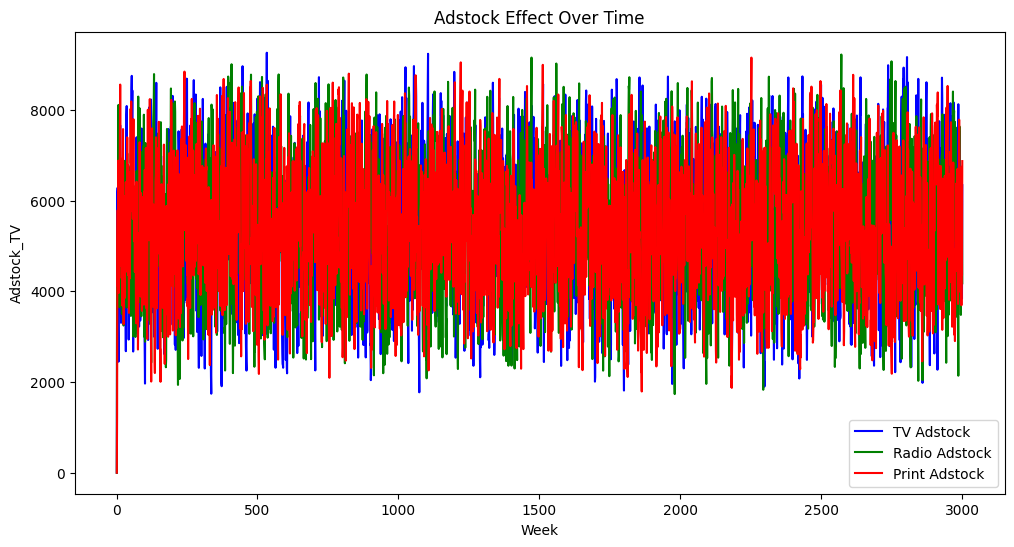

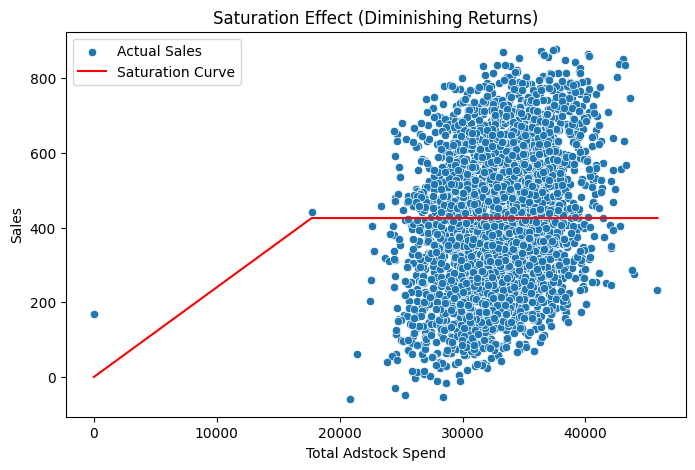

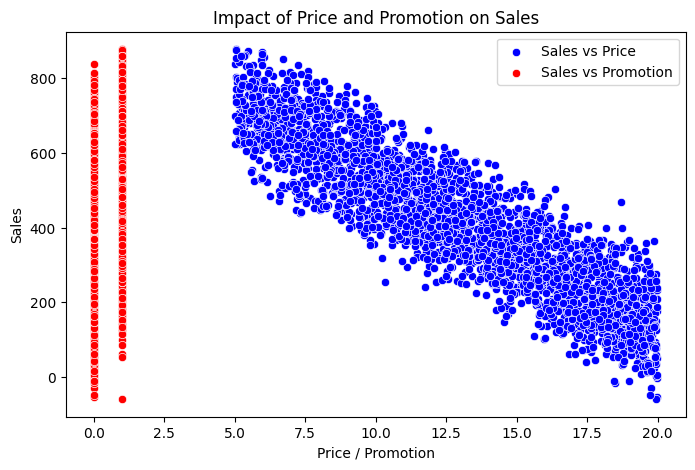


🔹 Processed data saved to: /content/marketing_analysis_results.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# Load dataset (Update this path for Google Colab)
file_path = "/content/MMM brand data.csv"  # Replace with actual Google Colab path
df = pd.read_csv(file_path)

# Inspect dataset
print(df.head())

# ---------------------------- ADSTOCK EFFECT ----------------------------
# Adstock function to model carryover effect of marketing
def adstock(series, decay):
    result = np.zeros_like(series)
    for i in range(1, len(series)):
        result[i] = series[i] + decay * result[i-1]
    return result

# Apply Adstock effect for each marketing channel
decay_rate = 0.5  # Define decay rate (can be optimized)
df['Adstock_TV'] = adstock(df['TV_Spend'], decay_rate)
df['Adstock_Radio'] = adstock(df['Radio_Spend'], decay_rate)
df['Adstock_Print'] = adstock(df['Print_Spend'], decay_rate)
df['Adstock_Search'] = adstock(df['Search_Spend'], decay_rate)
df['Adstock_YouTube'] = adstock(df['YouTube_Spend'], decay_rate)
df['Adstock_Social'] = adstock(df['Social Media_Spend'], decay_rate)

# ---------------------------- SATURATION EFFECT ----------------------------
# Function to model diminishing returns (Saturation effect using an S-Curve function)
def saturation_function(x, a, b):
    return a * (1 - np.exp(-b * x))

# Fit saturation model for total marketing spend
df['Total_Adstock_Spend'] = df[['Adstock_TV', 'Adstock_Radio', 'Adstock_Print', 'Adstock_Search', 'Adstock_YouTube', 'Adstock_Social']].sum(axis=1)
popt, _ = curve_fit(saturation_function, df['Total_Adstock_Spend'], df['Sales'])
df['Saturation_Effect'] = saturation_function(df['Total_Adstock_Spend'], *popt)

# ---------------------------- PROMOTION EFFECT ----------------------------
# Check correlation between promotions and sales
promotion_correlation = df[['Promotion', 'Sales']].corr().iloc[0, 1]
print(f"\nCorrelation between Promotion and Sales: {promotion_correlation:.4f}")

# Fit Linear Regression to Estimate Promotion Impact
X_promo = sm.add_constant(df[['Promotion']])  # Independent variable
y_promo = df['Sales']  # Dependent variable

promo_model = sm.OLS(y_promo, X_promo).fit()
print("\nPromotion Impact Regression Summary:")
print(promo_model.summary())

# ---------------------------- MARKETING MIX MODEL (MMM) ----------------------------
# Define independent variables for MMM
X_mmm = sm.add_constant(df[['Adstock_TV', 'Adstock_Radio', 'Adstock_Print', 'Adstock_Search', 'Adstock_YouTube', 'Adstock_Social', 'Saturation_Effect', 'Promotion', 'Price']])
y_mmm = df['Sales']

# Fit MMM Model
mmm_model = sm.OLS(y_mmm, X_mmm).fit()
print("\nMarketing Mix Model Summary:")
print(mmm_model.summary())

# ---------------------------- VISUALIZATIONS ----------------------------

# Plot Adstock Effect Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Week', y='Adstock_TV', label="TV Adstock", color='blue')
sns.lineplot(data=df, x='Week', y='Adstock_Radio', label="Radio Adstock", color='green')
sns.lineplot(data=df, x='Week', y='Adstock_Print', label="Print Adstock", color='red')
plt.title("Adstock Effect Over Time")
plt.legend()
plt.show()

# Plot Saturation Effect
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Total_Adstock_Spend'], y=df['Sales'], label="Actual Sales")
sns.lineplot(x=df['Total_Adstock_Spend'], y=df['Saturation_Effect'], color='red', label="Saturation Curve")
plt.title("Saturation Effect (Diminishing Returns)")
plt.xlabel("Total Adstock Spend")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Plot Price & Promotion Impact
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Price'], y=df['Sales'], label="Sales vs Price", color='blue')
sns.scatterplot(x=df['Promotion'], y=df['Sales'], label="Sales vs Promotion", color='red')
plt.title("Impact of Price and Promotion on Sales")
plt.xlabel("Price / Promotion")
plt.ylabel("Sales")
plt.legend()
plt.show()

# ---------------------------- SAVE PROCESSED DATA ----------------------------

output_file = "/content/marketing_analysis_results.csv"
df.to_csv(output_file, index=False)
print(f"\n🔹 Processed data saved to: {output_file}")


KeyError: 'Social_Spend'

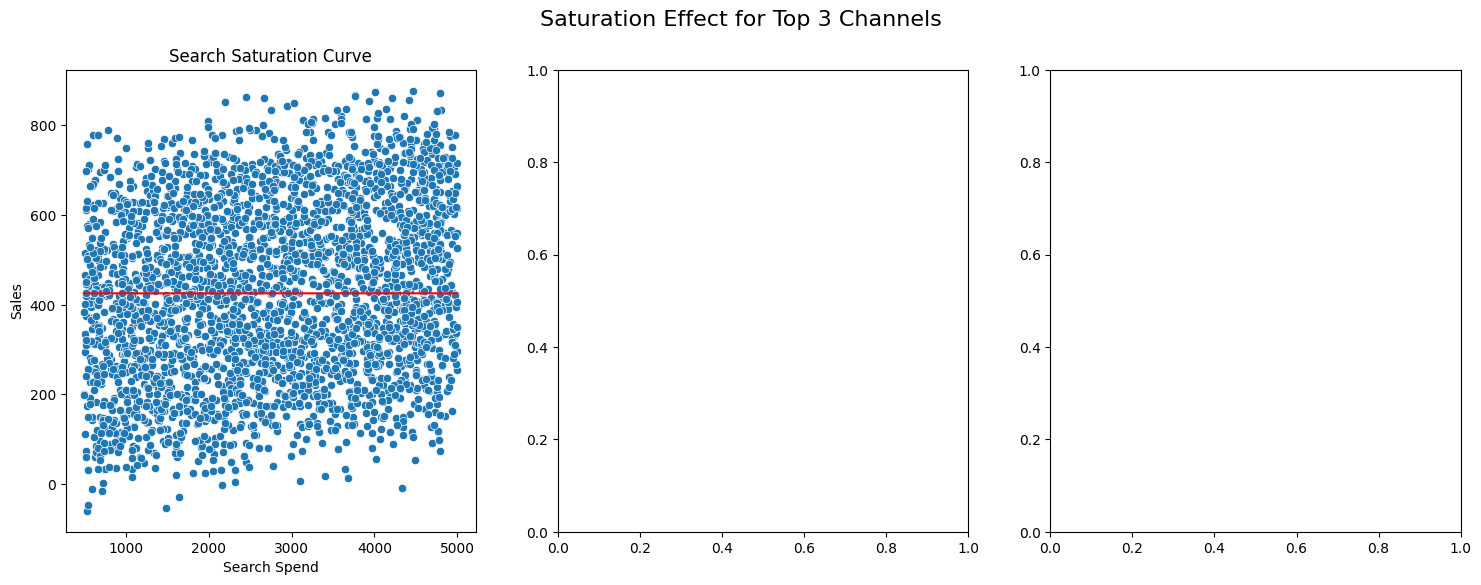

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- SATURATION EFFECT FOR TOP 3 CHANNELS ----------------------------

# Get top 3 channels based on coefficients
top_3_channels = sorted_channels.head(3).index.str.replace('Adstock_', '')

# Create subplots for each top channel
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Saturation Effect for Top 3 Channels", fontsize=16)

for i, channel in enumerate(top_3_channels):
    sns.scatterplot(x=df[f'{channel}_Spend'], y=df['Sales'], ax=axes[i])
    sns.lineplot(x=df[f'{channel}_Spend'], y=saturation_function(df[f'{channel}_Spend'], *popt), color='red', ax=axes[i])
    axes[i].set_title(f'{channel} Saturation Curve')
    axes[i].set_xlabel(f'{channel} Spend')
    axes[i].set_ylabel('Sales')

plt.tight_layout()
plt.show()

# ---------------------------- PROMOTION EFFECT ON CHANNELS ----------------------------

# Group data by channel and promotion, and calculate average sales
promotion_performance = df.groupby(['Promotion', 'Channel'])['Sales'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Sales', hue='Promotion', data=promotion_performance, palette="viridis")
plt.title("Promotion Performance on Channels")
plt.xlabel("Marketing Channel")
plt.ylabel("Average Sales")
plt.legend(title="Promotion")
plt.show()

# ... (Rest of your code for saving data, etc.) ...

<ipython-input-13-3c0205fd27d6>:37: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])


KeyError: 'Social_Spend'

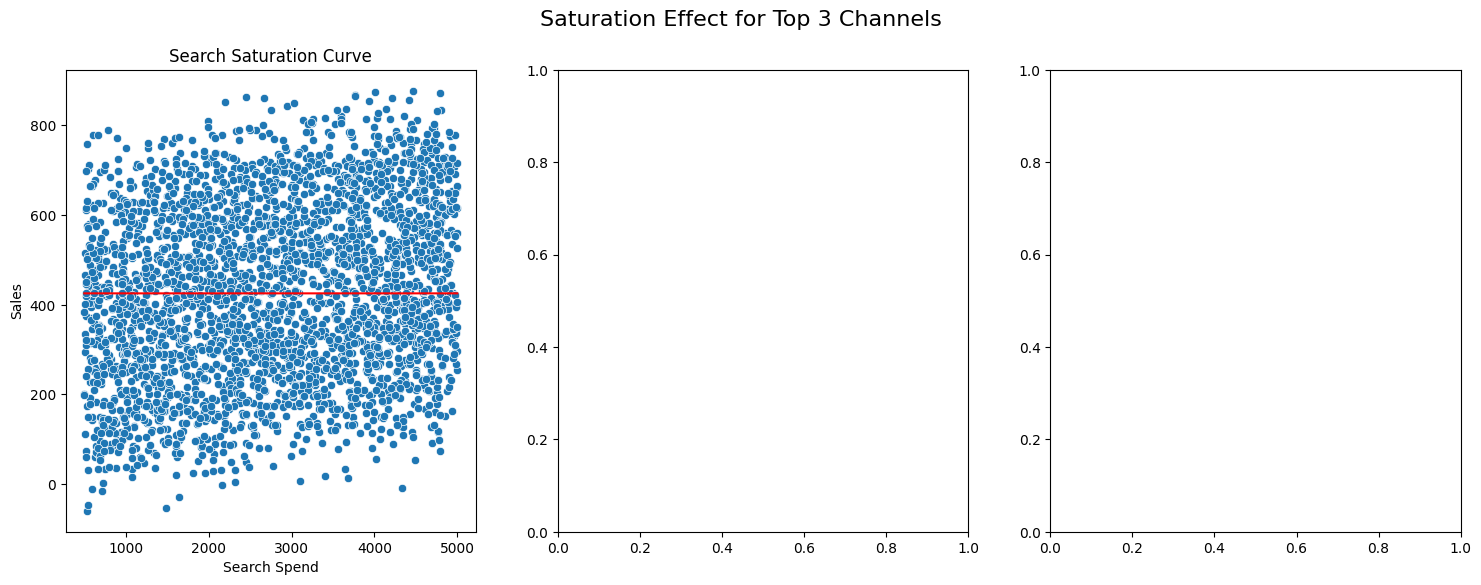

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- CHANNEL PERFORMANCE INSIGHTS ----------------------------

# Get coefficients from the MMM model
mmm_coef = mmm_model.params.drop('const')  # Exclude the constant term

# Filter for marketing channels (exclude other variables)
channel_coef = mmm_coef[mmm_coef.index.str.startswith('Adstock_')]

# Sort channels by coefficient (impact on sales)
sorted_channels = channel_coef.sort_values(ascending=False)

# ---------------------------- SATURATION EFFECT FOR TOP 3 CHANNELS ----------------------------

# Get top 3 channels based on coefficients
top_3_channels = sorted_channels.head(3).index.str.replace('Adstock_', '')

# Create subplots for each top channel
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Saturation Effect for Top 3 Channels", fontsize=16)

for i, channel in enumerate(top_3_channels):
    # Access spend data using the original column name (e.g., 'TV_Spend')
    spend_data = df[f'{channel}_Spend']

    sns.scatterplot(x=spend_data, y=df['Sales'], ax=axes[i])

    # Fit saturation curve for each channel individually
    popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])
    sns.lineplot(x=spend_data, y=saturation_function(spend_data, *popt_channel), color='red', ax=axes[i])

    axes[i].set_title(f'{channel} Saturation Curve')
    axes[i].set_xlabel(f'{channel} Spend')
    axes[i].set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- BUDGET OPTIMIZATION ----------------------------

# Get coefficients from the MMM model
mmm_coef = mmm_model.params.drop(['const'])  # Exclude the constant term

# Filter for marketing channels (exclude other variables like Saturation, Promotion, Price)
channel_coef = mmm_coef[mmm_coef.index.str.startswith('Adstock_')]

# Normalize coefficients (to compare channels on a similar scale)
normalized_coef = channel_coef / channel_coef.abs().sum()

# Define total budget (you can adjust this)
total_budget = 100000  # Example total budget

# Allocate budget proportionally based on normalized coefficients
optimized_budget = normalized_coef * total_budget

# Print optimized budget allocation
print("\nOptimized Budget Allocation:")
for channel, budget in optimized_budget.items():
    print(f"{channel.replace('Adstock_', ''):12}: ${budget:.2f}")

# ... (Rest of your code for saving data, etc.) ...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- BUDGET OPTIMIZATION ----------------------------

# Get coefficients from the MMM model
mmm_coef = mmm_model.params.drop(['const'])  # Exclude the constant term

# Filter for marketing channels (exclude other variables like Saturation, Promotion, Price)
channel_coef = mmm_coef[mmm_coef.index.str.startswith('Adstock_')]

# Normalize coefficients (to compare channels on a similar scale)
normalized_coef = channel_coef / channel_coef.abs().sum()

# Define total budget (you can adjust this)
total_budget = 100000  # Example total budget

# Allocate budget proportionally based on normalized coefficients
optimized_budget = normalized_coef * total_budget

# Print optimized budget allocation
print("\nOptimized Budget Allocation:")
for channel, budget in optimized_budget.items():
    print(f"{channel.replace('Adstock_', ''):12}: ${budget:.2f}")

# ... (Rest of your code for saving data, etc.) ...


Optimized Budget Allocation:
TV          : $10878.97
Radio       : $12662.16
Print       : $9371.12
Search      : $33924.23
YouTube     : $11873.61
Social      : $21289.91


<ipython-input-14-3e90fde30c14>:37: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])


KeyError: 'Social_Spend'

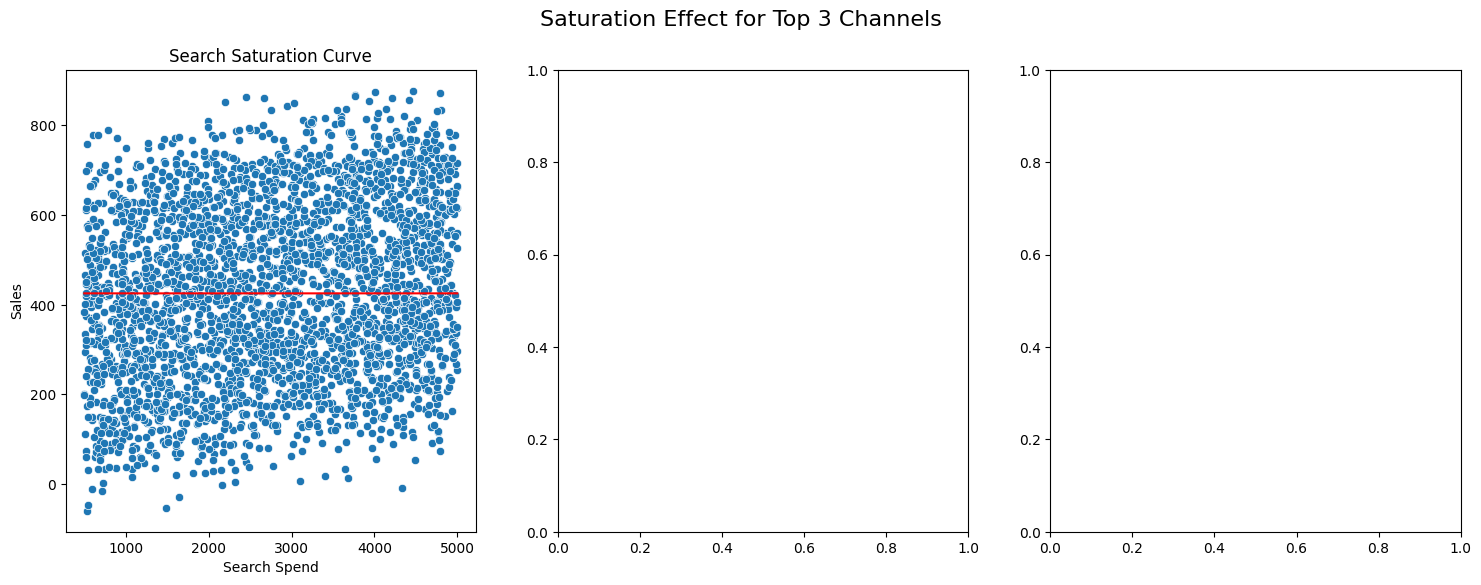

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- CHANNEL PERFORMANCE INSIGHTS ----------------------------

# Get coefficients from the MMM model
mmm_coef = mmm_model.params.drop('const')  # Exclude the constant term

# Filter for marketing channels (exclude other variables)
channel_coef = mmm_coef[mmm_coef.index.str.startswith('Adstock_')]

# Sort channels by coefficient (impact on sales)
sorted_channels = channel_coef.sort_values(ascending=False)

# ---------------------------- SATURATION EFFECT FOR TOP 3 CHANNELS ----------------------------

# Get top 3 channels based on coefficients
top_3_channels = sorted_channels.head(3).index.str.replace('Adstock_', '')

# Create subplots for each top channel
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Saturation Effect for Top 3 Channels", fontsize=16)

for i, channel in enumerate(top_3_channels):
    # Access spend data using the original column name (e.g., 'TV_Spend')
    spend_data = df[f'{channel}_Spend']

    sns.scatterplot(x=spend_data, y=df['Sales'], ax=axes[i])

    # Fit saturation curve for each channel individually
    popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])
    sns.lineplot(x=spend_data, y=saturation_function(spend_data, *popt_channel), color='red', ax=axes[i])

    axes[i].set_title(f'{channel} Saturation Curve')
    axes[i].set_xlabel(f'{channel} Spend')
    axes[i].set_ylabel('Sales')

plt.tight_layout()
plt.show()

# ---------------------------- PROMOTION EFFECT ON CHANNELS ----------------------------

# Assuming 'Channel' column exists in your DataFrame (create it if needed)
# For example: df['Channel'] = df['TV_Spend'].where(df['TV_Spend'] > 0, 0) + ...
# ... (Similar logic for other channels)

# Group data by channel and promotion, and calculate average sales
promotion_performance = df.groupby(['Promotion', 'Channel'])['Sales'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Sales', hue='Promotion', data=promotion_performance, palette="viridis")
plt.title("Promotion Performance on Channels")
plt.xlabel("Marketing Channel")
plt.ylabel("Average Sales")
plt.legend(title="Promotion")
plt.show()

# ... (Rest of your code for saving data, etc.) ...

<ipython-input-15-d0b410e72010>:37: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])


KeyError: 'Social_Spend'

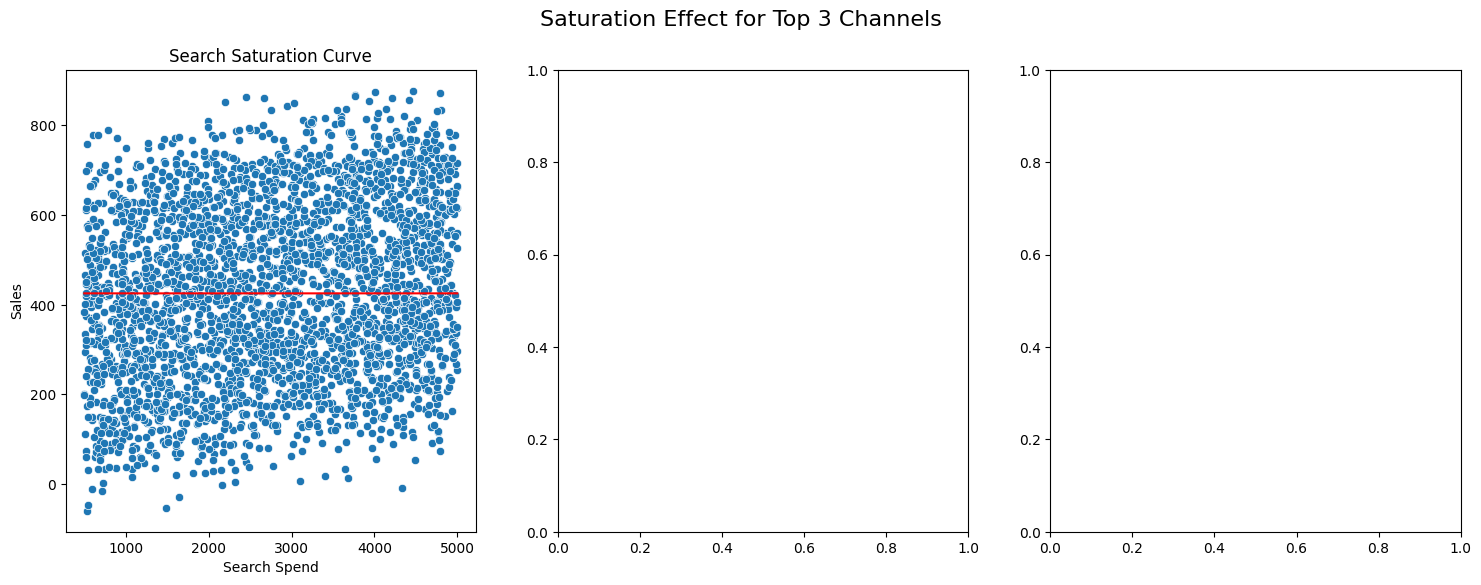

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- CHANNEL PERFORMANCE INSIGHTS ----------------------------

# Get coefficients from the MMM model
mmm_coef = mmm_model.params.drop('const')  # Exclude the constant term

# Filter for marketing channels (exclude other variables)
channel_coef = mmm_coef[mmm_coef.index.str.startswith('Adstock_')]

# Sort channels by coefficient (impact on sales)
sorted_channels = channel_coef.sort_values(ascending=False)

# ---------------------------- SATURATION EFFECT FOR TOP 3 CHANNELS ----------------------------

# Get top 3 channels based on coefficients
top_3_channels = sorted_channels.head(3).index.str.replace('Adstock_', '')

# Create subplots for each top channel
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Saturation Effect for Top 3 Channels", fontsize=16)

for i, channel in enumerate(top_3_channels):
    # Access spend data using the original column name (e.g., 'TV_Spend')
    spend_data = df[f'{channel}_Spend']

    sns.scatterplot(x=spend_data, y=df['Sales'], ax=axes[i])

    # Fit saturation curve for each channel individually
    popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])
    sns.lineplot(x=spend_data, y=saturation_function(spend_data, *popt_channel), color='red', ax=axes[i])

    axes[i].set_title(f'{channel} Saturation Curve')
    axes[i].set_xlabel(f'{channel} Spend')
    axes[i].set_ylabel('Sales')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

#

<ipython-input-16-e2b12b041b73>:43: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])
<ipython-input-16-e2b12b041b73>:43: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])
<ipython-input-16-e2b12b041b73>:43: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])


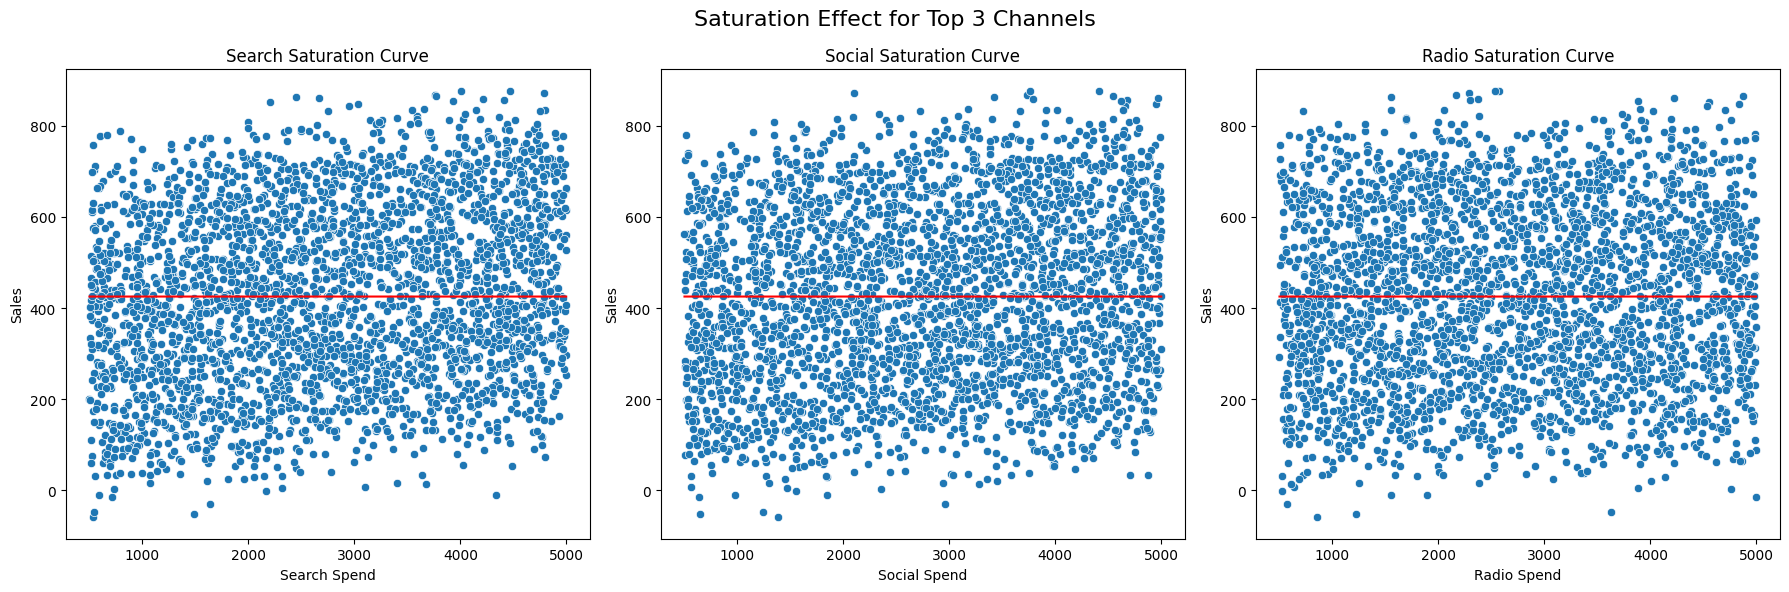

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- CHANNEL PERFORMANCE INSIGHTS ----------------------------

# ... (Your existing code for channel performance insights) ...

# ---------------------------- SATURATION EFFECT FOR TOP 3 CHANNELS ----------------------------

# Get top 3 channels based on coefficients
top_3_channels = sorted_channels.head(3).index.str.replace('Adstock_', '')

# Create subplots for each top channel
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Saturation Effect for Top 3 Channels", fontsize=16)

# Dictionary mapping channel names to spend column names
channel_spend_mapping = {
    'TV': 'TV_Spend',
    'Radio': 'Radio_Spend',
    'Print': 'Print_Spend',
    'Search': 'Search_Spend',
    'YouTube': 'YouTube_Spend',
    'Social': 'Social Media_Spend'  # Corrected to 'Social Media_Spend'
}

for i, channel in enumerate(top_3_channels):
    # Access spend data using the mapping
    spend_column = channel_spend_mapping.get(channel)
    if spend_column is None:
        raise KeyError(f"No spend column found for channel '{channel}'")
    spend_data = df[spend_column]

    sns.scatterplot(x=spend_data, y=df['Sales'], ax=axes[i])

    # Fit saturation curve for each channel individually
    popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])
    sns.lineplot(x=spend_data, y=saturation_function(spend_data, *popt_channel), color='red', ax=axes[i])

    axes[i].set_title(f'{channel} Saturation Curve')
    axes[i].set_xlabel(f'{channel} Spend')
    axes[i].set_ylabel('Sales')

plt.tight_layout()
plt.show()

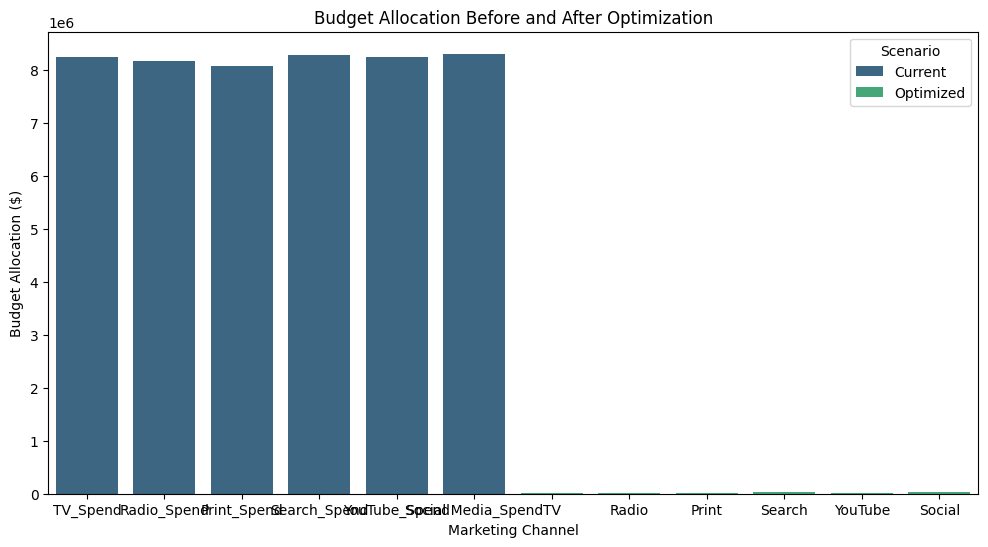

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- BUDGET OPTIMIZATION ----------------------------

# ... (Your existing code for budget optimization) ...

# ---------------------------- VISUALIZE BUDGET BEFORE & AFTER OPTIMIZATION ----------------------------

# Get current budget allocation from the DataFrame (assuming column names match channels)
current_budget = df[['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']].sum()

# Create DataFrames for current and optimized budgets
current_budget_df = pd.DataFrame(current_budget, columns=['Budget']).reset_index()
current_budget_df = current_budget_df.rename(columns={'index': 'Channel'})

optimized_budget_df = pd.DataFrame(optimized_budget, columns=['Budget']).reset_index()
optimized_budget_df = optimized_budget_df.rename(columns={'index': 'Channel'})
optimized_budget_df['Channel'] = optimized_budget_df['Channel'].str.replace('Adstock_', '')

# Combine the DataFrames and add a 'Scenario' column
budget_comparison_df = pd.concat([
    current_budget_df.assign(Scenario='Current'),
    optimized_budget_df.assign(Scenario='Optimized')
])

# Create the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='Budget', hue='Scenario', data=budget_comparison_df, palette="viridis")
plt.title("Budget Allocation Before and After Optimization")
plt.xlabel("Marketing Channel")
plt.ylabel("Budget Allocation ($)")
plt.legend(title="Scenario")
plt.show()

# ... (Rest of your code for saving data, etc.) ...

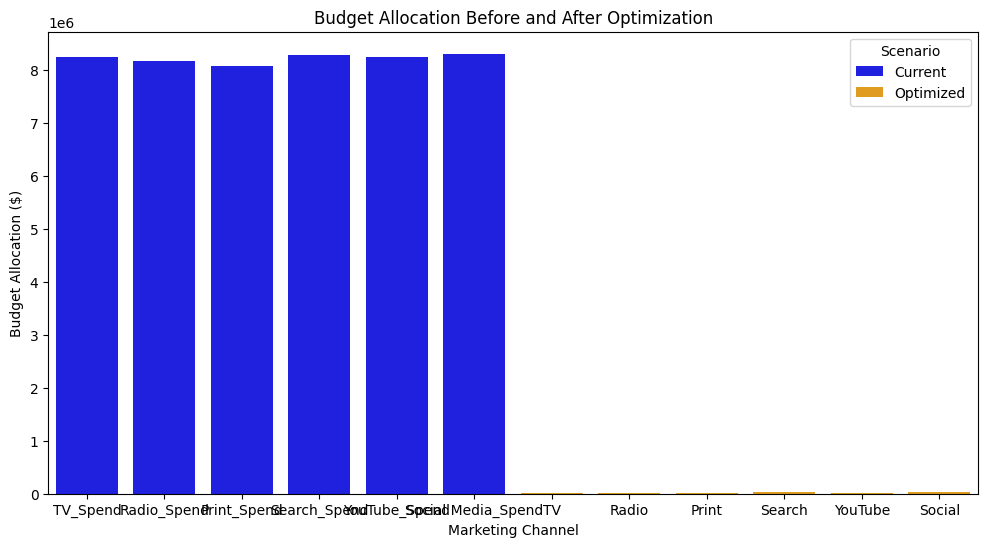

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- BUDGET OPTIMIZATION ----------------------------

# ... (Your existing code for budget optimization) ...

# ---------------------------- VISUALIZE BUDGET BEFORE & AFTER OPTIMIZATION ----------------------------

# Get current budget allocation from the DataFrame (assuming column names match channels)
current_budget = df[['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']].sum()

# Create DataFrames for current and optimized budgets
current_budget_df = pd.DataFrame(current_budget, columns=['Budget']).reset_index()
current_budget_df = current_budget_df.rename(columns={'index': 'Channel'})

optimized_budget_df = pd.DataFrame(optimized_budget, columns=['Budget']).reset_index()
optimized_budget_df = optimized_budget_df.rename(columns={'index': 'Channel'})
optimized_budget_df['Channel'] = optimized_budget_df['Channel'].str.replace('Adstock_', '')

# Combine the DataFrames and add a 'Scenario' column
budget_comparison_df = pd.concat([
    current_budget_df.assign(Scenario='Current'),
    optimized_budget_df.assign(Scenario='Optimized')
])

# Create the bar graph with blue and orange colors
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='Budget', hue='Scenario', data=budget_comparison_df, palette={'Current': 'blue', 'Optimized': 'orange'})  # Specify colors
plt.title("Budget Allocation Before and After Optimization")
plt.xlabel("Marketing Channel")
plt.ylabel("Budget Allocation ($)")
plt.legend(title="Scenario")
plt.show()

# ... (Rest of your code for saving data, etc.) ...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- BUDGET OPTIMIZATION ----------------------------

# ... (Your existing code for budget optimization) ...

# ---------------------------- VISUALIZE OPTIMIZED BUDGET ----------------------------

# Create a DataFrame for the optimized budget
optimized_budget_df = pd.DataFrame(optimized_budget, columns=['Budget']).reset_index()
optimized_budget_df = optimized_budget_df.rename(columns={'index': 'Channel'})
optimized_budget_df['Channel'] = optimized_budget_df['Channel'].str.replace('Adstock_', '')  # Remove 'Adstock_'

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Budget', y='Channel', data=optimized_budget_df, palette="viridis")
plt.title("Optimized Budget Allocation")
plt.xlabel("Budget Allocation ($)")
plt.ylabel("Marketing Channel")
plt.show()

# ... (Rest of your code for saving data, etc.) ...

<ipython-input-11-739ec2496663>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Budget', y='Channel', data=optimized_budget_df, palette="viridis")


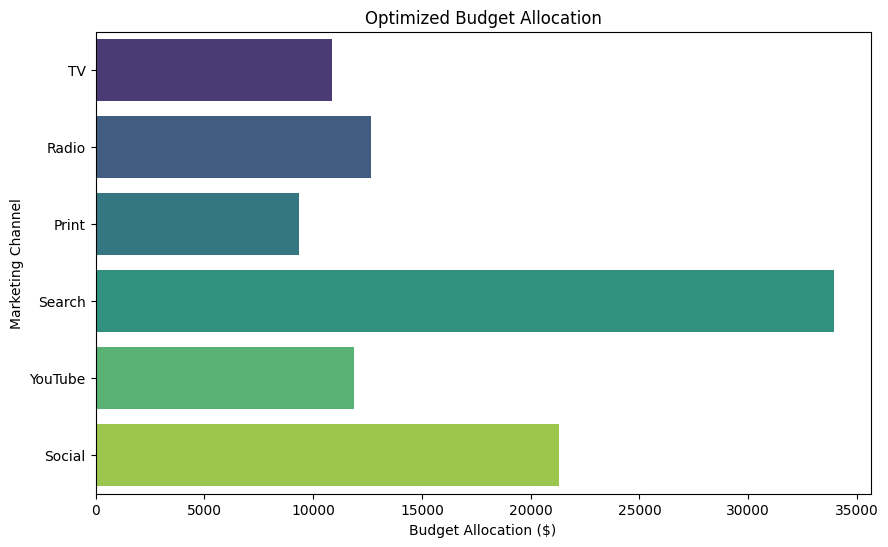

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- BUDGET OPTIMIZATION ----------------------------

# ... (Your existing code for budget optimization) ...

# ---------------------------- VISUALIZE OPTIMIZED BUDGET ----------------------------

# Create a DataFrame for the optimized budget
optimized_budget_df = pd.DataFrame(optimized_budget, columns=['Budget']).reset_index()
optimized_budget_df = optimized_budget_df.rename(columns={'index': 'Channel'})
optimized_budget_df['Channel'] = optimized_budget_df['Channel'].str.replace('Adstock_', '')  # Remove 'Adstock_'

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Budget', y='Channel', data=optimized_budget_df, palette="viridis")
plt.title("Optimized Budget Allocation")
plt.xlabel("Budget Allocation ($)")
plt.ylabel("Marketing Channel")
plt.show()

# ... (Rest of your code for saving data, etc.) ...


Channel Performance Insights (Sorted by Impact on Sales):
Search      : 0.0274
Social      : 0.0172
Radio       : 0.0102
YouTube     : 0.0096
TV          : 0.0088
Print       : 0.0076


<ipython-input-8-b416cc96eac9>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_channels.values, y=sorted_channels.index, palette="viridis")


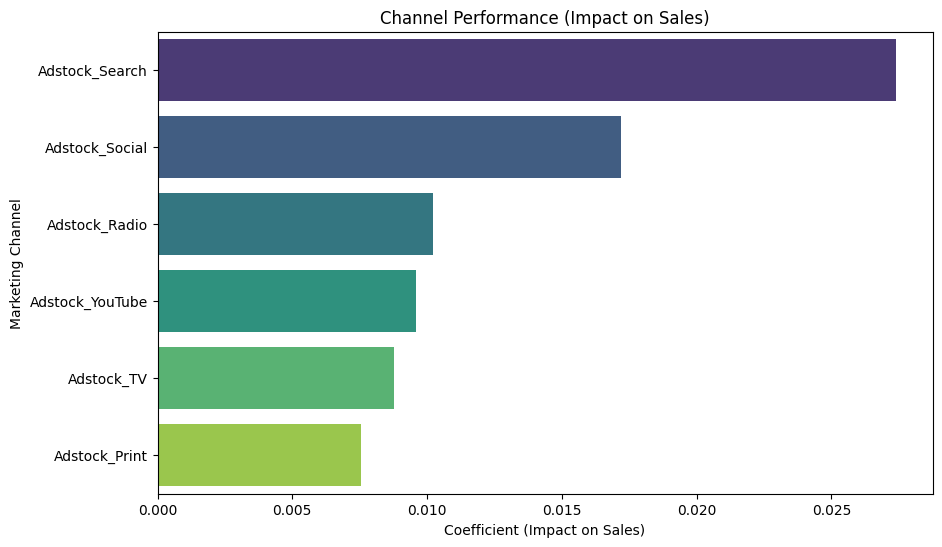

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- CHANNEL PERFORMANCE INSIGHTS ----------------------------

# Get coefficients from the MMM model
mmm_coef = mmm_model.params.drop(['const'])  # Exclude the constant term

# Filter for marketing channels (exclude other variables like Saturation, Promotion, Price)
channel_coef = mmm_coef[mmm_coef.index.str.startswith('Adstock_')]

# Sort channels by coefficient (impact on sales)
sorted_channels = channel_coef.sort_values(ascending=False)

# Print channel performance insights
print("\nChannel Performance Insights (Sorted by Impact on Sales):")
for channel, coef in sorted_channels.items():
    print(f"{channel.replace('Adstock_', ''):12}: {coef:.4f}")

# ---------------------------- BAR GRAPH VISUALIZATION ----------------------------

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_channels.values, y=sorted_channels.index, palette="viridis")
plt.title("Channel Performance (Impact on Sales)")
plt.xlabel("Coefficient (Impact on Sales)")
plt.ylabel("Marketing Channel")
plt.show()

# ... (Rest of your code for saving data, etc.) ...

<ipython-input-20-321b319231bc>:44: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])
<ipython-input-20-321b319231bc>:44: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])
<ipython-input-20-321b319231bc>:44: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])


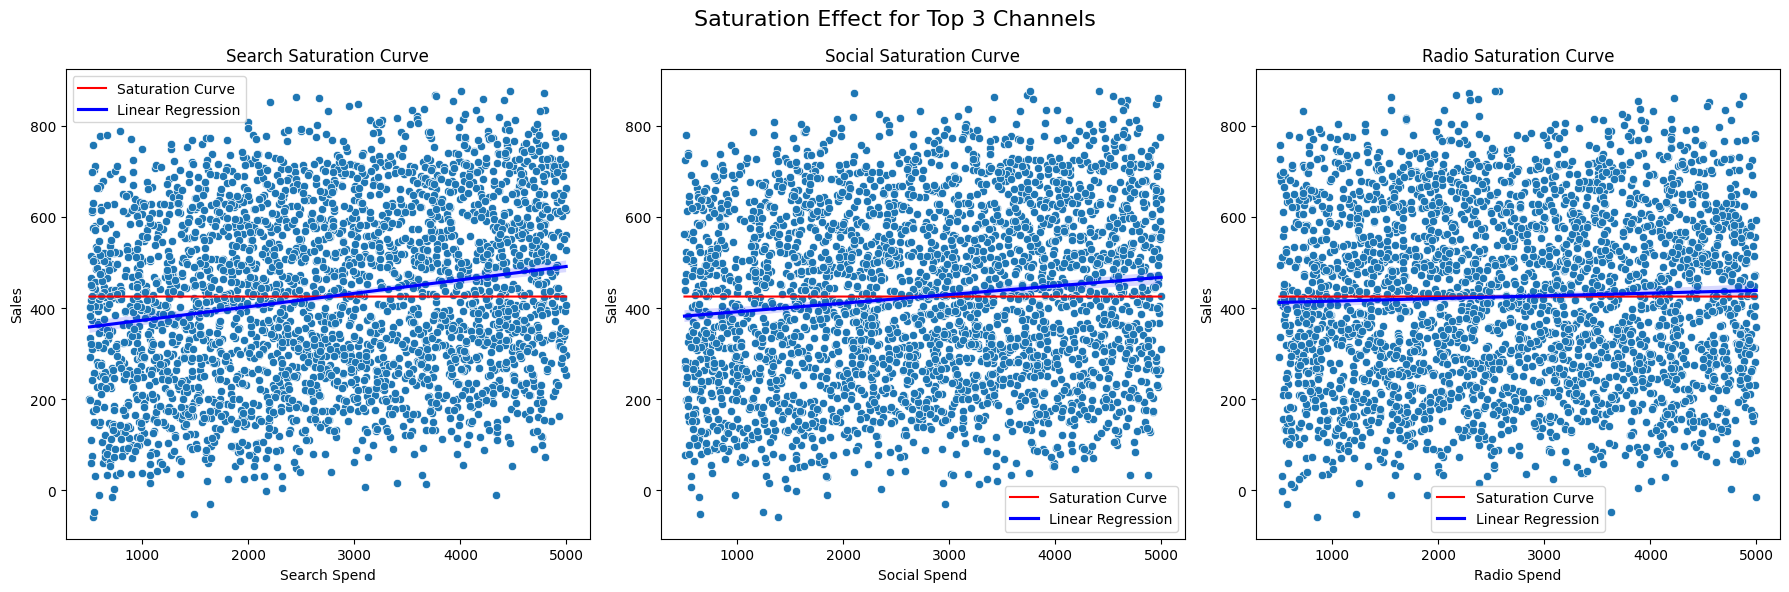

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- CHANNEL PERFORMANCE INSIGHTS ----------------------------

# ... (Your existing code for channel performance insights) ...

# ---------------------------- SATURATION EFFECT FOR TOP 3 CHANNELS ----------------------------

# Get top 3 channels based on coefficients
top_3_channels = sorted_channels.head(3).index.str.replace('Adstock_', '')

# Create subplots for each top channel
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Saturation Effect for Top 3 Channels", fontsize=16)

# Dictionary mapping channel names to spend column names
channel_spend_mapping = {
    'TV': 'TV_Spend',
    'Radio': 'Radio_Spend',
    'Print': 'Print_Spend',
    'Search': 'Search_Spend',
    'YouTube': 'YouTube_Spend',
    'Social': 'Social Media_Spend'  # Corrected to 'Social Media_Spend'
}

for i, channel in enumerate(top_3_channels):
    # Access spend data using the mapping
    spend_column = channel_spend_mapping.get(channel)
    if spend_column is None:
        raise KeyError(f"No spend column found for channel '{channel}'")
    spend_data = df[spend_column]

    # Scatter plot
    sns.scatterplot(x=spend_data, y=df['Sales'], ax=axes[i])

    # Fit saturation curve for each channel individually
    popt_channel, _ = curve_fit(saturation_function, spend_data, df['Sales'])
    sns.lineplot(x=spend_data, y=saturation_function(spend_data, *popt_channel), color='red', ax=axes[i], label='Saturation Curve')

    # Add linear regression line
    sns.regplot(x=spend_data, y=df['Sales'], ax=axes[i], scatter=False, color='blue', label='Linear Regression')

    axes[i].set_title(f'{channel} Saturation Curve')
    axes[i].set_xlabel(f'{channel} Spend')
    axes[i].set_ylabel('Sales')
    axes[i].legend()  # Show legend

plt.tight_layout()
plt.show()

# ... (Rest of your code for saving data, etc.) ...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

# ... (Your existing code for loading data, adstock, saturation, etc.) ...

# ---------------------------- PROMOTION EFFECT ON CHANNELS ----------------------------

# Assuming 'Channel' column exists in your DataFrame (create it if needed)
# If not, you'll need to create it based on your data structure
# Example: df['Channel'] = np.where(df['TV_Spend'] > 0, 'TV',
#                                 np.where(df['Radio_Spend'] > 0, 'Radio',
#                                          # ... and so on for other channels
#                                          'Other'))

# Group data by channel and promotion, and calculate average sales
promotion_performance = df.groupby(['Promotion', 'Channel'])['Sales'].mean().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='Sales', hue='Promotion', data=promotion_performance, palette="viridis")
plt.title("Promotion Performance on Channels")
plt.xlabel("Marketing Channel")
plt.ylabel("Average Sales")
plt.legend(title="Promotion")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# ... (Rest of your code for saving data, etc.) ...